In [58]:
import numpy as np

from fealpy.mesh import MeshFactory as mf
from fealpy.functionspace import LagrangeFiniteElementSpace

import matplotlib.pyplot as plt 

run boxmesh2d with time: 0.0014319000001705717


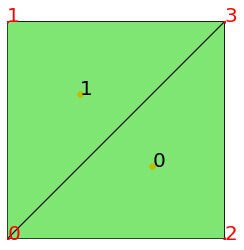

gdof: 4
celltodof:
0 [2 3 0]
1 [1 0 3]


In [59]:
mesh=mf.boxmesh2d([0,1,0,1],nx=1,ny=1,meshtype='tri')

fig=plt.figure()
axes=fig.gca()
mesh.add_plot(axes)
mesh.find_node(axes,showindex=True,fontsize=20)
mesh.find_cell(axes,showindex=True,fontsize=20)
plt.show()

space=LagrangeFiniteElementSpace(mesh,p=1) # 一次多项式
gdof=space.number_of_global_dofs()
print('gdof:',gdof)


cell2dof=space.cell_to_dof()
print('celltodof:')
for i,var in enumerate(cell2dof):
    print(i,var)

In [60]:
cellmeasure=mesh.entity_measure('cell')
print(cellmeasure)

qf=mesh.integrator(5,'edge') # 积分精度
display(qf)

bcs,ws=qf.get_quadrature_points_and_weights()

print(bcs,ws)

# gphi=space.grad_basis(bcs) # (NQ,NC,ldof,GD)

# display(gphi.shape)

[0.5 0.5]


[[0.95308992 0.04691008]
 [0.76923466 0.23076534]
 [0.5        0.5       ]
 [0.23076534 0.76923466]
 [0.04691008 0.95308992]] [0.11846344 0.23931434 0.28444444 0.23931434 0.11846344]


In [61]:
cellmeasure=mesh.entity_measure('cell')
print(cellmeasure)

qf=mesh.integrator(5,'cell') # 积分精度
display(qf)

bcs,ws=qf.get_quadrature_points_and_weights()

print(bcs,ws)

gphi=space.grad_basis(bcs) # (NQ,NC,ldof,GD)

display(gphi.shape)

[0.5 0.5]


[[0.92825824 0.03587088 0.03587088]
 [0.03587088 0.92825824 0.03587088]
 [0.03587088 0.03587088 0.92825824]
 [0.51654121 0.2417294  0.2417294 ]
 [0.2417294  0.51654121 0.2417294 ]
 [0.2417294  0.2417294  0.51654121]
 [0.47430879 0.47430879 0.05138242]
 [0.47430879 0.05138242 0.47430879]
 [0.05138242 0.47430879 0.47430879]
 [0.20150388 0.75118363 0.04731249]
 [0.20150388 0.04731249 0.75118363]
 [0.04731249 0.20150388 0.75118363]
 [0.75118363 0.20150388 0.04731249]
 [0.75118363 0.04731249 0.20150388]
 [0.04731249 0.75118363 0.20150388]] [0.01791546 0.01791546 0.01791546 0.1277122  0.1277122  0.1277122
 0.07620606 0.07620606 0.07620606 0.05574981 0.05574981 0.05574981
 0.05574981 0.05574981 0.05574981]


(15, 2, 3, 2)

In [62]:
A=np.einsum('i,ijkl,ijml,j->jkm',ws,gphi,gphi,cellmeasure) # 
display(A.shape)
display(cell2dof)

I=np.broadcast_to(cell2dof[:,:,None],shape=A.shape)
display(I)

J=np.broadcast_to(cell2dof[:,None,:],shape=A.shape)
display(J)

(2, 3, 3)

array([[2, 3, 0],
       [1, 0, 3]])

array([[[2, 2, 2],
        [3, 3, 3],
        [0, 0, 0]],

       [[1, 1, 1],
        [0, 0, 0],
        [3, 3, 3]]])

array([[[2, 3, 0],
        [2, 3, 0],
        [2, 3, 0]],

       [[1, 0, 3],
        [1, 0, 3],
        [1, 0, 3]]])

In [63]:
for i,j,val in zip(I.flat,J.flat,A.flat):
    print('(',i,j,'): ',val)

( 2 2 ):  0.9999999999999988
( 2 3 ):  -0.4999999999999994
( 2 0 ):  -0.4999999999999994
( 3 2 ):  -0.4999999999999994
( 3 3 ):  0.4999999999999994
( 3 0 ):  0.0
( 0 2 ):  -0.4999999999999994
( 0 3 ):  0.0
( 0 0 ):  0.4999999999999994
( 1 1 ):  0.9999999999999988
( 1 0 ):  -0.4999999999999994
( 1 3 ):  -0.4999999999999994
( 0 1 ):  -0.4999999999999994
( 0 0 ):  0.4999999999999994
( 0 3 ):  0.0
( 3 1 ):  -0.4999999999999994
( 3 0 ):  0.0
( 3 3 ):  0.4999999999999994


In [64]:
from scipy.sparse import csr_matrix
A=csr_matrix((A.flat,(I.flat,J.flat)),shape=(gdof,gdof)) # (gdof,gdof)
A.toarray()

array([[ 1. , -0.5, -0.5,  0. ],
       [-0.5,  1. ,  0. , -0.5],
       [-0.5,  0. ,  1. , -0.5],
       [ 0. , -0.5, -0.5,  1. ]])

In [66]:
A=space.stiff_matrix()
A.toarray()

run serial_construct_matrix with time: 0.004090200000064215


array([[ 1. , -0.5, -0.5,  0. ],
       [-0.5,  1. ,  0. , -0.5],
       [-0.5,  0. ,  1. , -0.5],
       [ 0. , -0.5, -0.5,  1. ]])

In [70]:
# 载荷矩阵组装
space.basis(bcs)

array([[[0.92825824, 0.03587088, 0.03587088]],

       [[0.03587088, 0.92825824, 0.03587088]],

       [[0.03587088, 0.03587088, 0.92825824]],

       [[0.51654121, 0.2417294 , 0.2417294 ]],

       [[0.2417294 , 0.51654121, 0.2417294 ]],

       [[0.2417294 , 0.2417294 , 0.51654121]],

       [[0.47430879, 0.47430879, 0.05138242]],

       [[0.47430879, 0.05138242, 0.47430879]],

       [[0.05138242, 0.47430879, 0.47430879]],

       [[0.20150388, 0.75118363, 0.04731249]],

       [[0.20150388, 0.04731249, 0.75118363]],

       [[0.04731249, 0.20150388, 0.75118363]],

       [[0.75118363, 0.20150388, 0.04731249]],

       [[0.75118363, 0.04731249, 0.20150388]],

       [[0.04731249, 0.75118363, 0.20150388]]])

In [73]:
display(space.basis(bcs).shape)

(15, 1, 3)

In [82]:
from fealpy.decorator import cartesian

@cartesian
def f(p):
    x=p[...,0]
    y=p[...,1]
    return np.exp(x**2+y**2)

display(f.coordtype)
qf=mesh.integrator(3,'cell')
bcs,ws=qf.get_quadrature_points_and_weights()

'cartesian'

In [92]:
bcs
phi=space.basis(bcs)
ps=mesh.bc_to_point(bcs)
ps

val=f(ps)
display(val)

bb=np.einsum('i,ij,ijk,j->jk',ws,val,phi,cellmeasure)

F=np.zeros(gdof,dtype=np.float64)
np.add.at(F,cell2dof,bb)

array([[2.30163555, 2.30163555],
       [4.4480853 , 1.04282254],
       [1.04282254, 4.4480853 ],
       [2.70296761, 1.37528274],
       [1.37528274, 2.70296761],
       [1.65838317, 1.65838317]])

In [120]:
import random
random.seed(10)

A_1=np.random.rand(3,3)
B_1=A_1+1
display(A_1,B_1)

array([[0.66021341, 0.44685519, 0.99286332],
       [0.7857893 , 0.01586999, 0.14872647],
       [0.41430437, 0.65583547, 0.18748136]])

array([[1.66021341, 1.44685519, 1.99286332],
       [1.7857893 , 1.01586999, 1.14872647],
       [1.41430437, 1.65583547, 1.18748136]])

In [121]:
A_1.append(B_1)

AttributeError: 'numpy.ndarray' object has no attribute 'append'

In [123]:
np.random.seed(10)
a=np.random.rand(2,3,4)
b=np.random.rand(2,3,4)+1

In [125]:
c=np.einsum('ijk,ijk->k',a,b)
display(c)
print(c)

array([4.11233184, 2.22330895, 4.56492814, 7.1234104 ])

[4.11233184 2.22330895 4.56492814 7.1234104 ]


In [126]:
c.append(c)

AttributeError: 'numpy.ndarray' object has no attribute 'append'